In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import *
import matplotlib.cm as cm
import seaborn as sns

# Load and format data

Loading and formatting all the relevant data, also grabbing the top 200 peaks by LogFC per cell type (stored in count_data_topdiff)

In [4]:
total_count_matrix = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/cell_line_data/motif_hits/motif_count_matrix_total_hits.tsv"
count_data = pd.read_csv(total_count_matrix, sep="\t", index_col=0)


In [5]:
peak_file = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/cell_line_data/peaks_by_cell_label_unique_dataloader_format.tsv"
peak_table = pd.read_csv(peak_file, sep="\t")
cat_list = list(peak_table["label"].values)
categories = list(set(cat_list))
labels = [categories.index(x) for x in cat_list]
count_data["label"] = cat_list

In [6]:
cell_lines = ["K562", "HEPG2", "GM12878", "IMR90", "H1ESC"]
de_peaks_pval_list = [pd.read_csv(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/cell_line_data/{cell_line}/diff_acc_peaks.csv", 
                             index_col=0) for cell_line in cell_lines]

# de_peaks_pval = [x.loc[x["log2FoldChange"] > 6.2] for x in de_peaks_pval]
# de_peaks_pval = pd.concat(de_peaks_pval)
# de_peaks_pval["peak_key"] = [create_peak_key(x) for x in de_peaks_pval.index]


In [7]:
def create_peak_key(peak_loc):
    chrom = peak_loc.split(":")[0]
    start = int(peak_loc.split(":")[1].split("-")[0])
    end = int(peak_loc.split(":")[1].split("-")[1])
    return str((chrom, start, end))

topk_cutoff = 200
de_peaks_pval_list_cutoff = [x.sort_values(by="log2FoldChange", ascending=False)[:200] for x in de_peaks_pval_list]
de_peaks_pval = pd.concat(de_peaks_pval_list_cutoff)
de_peaks_pval["peak_key"] = [create_peak_key(x) for x in de_peaks_pval.index]


In [8]:
count_data_topdiff = count_data.loc[de_peaks_pval["peak_key"]]


# Produce Heatmap

Producing a heatmap of the count data for the top 200 peaks/cell line


In [9]:
#TFIDF if necessary (currently not used)
count_data_topdiff_tfidf = TfidfTransformer().fit_transform(count_data_topdiff.iloc[:,:-1]).toarray()
count_data_topdiff_tfidf = pd.DataFrame(count_data_topdiff_tfidf, index=count_data_topdiff.index, columns=count_data_topdiff.columns[:-1])




/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

In [43]:
count_data_topdiff.filter(regex="SPI1|HNF4|GATA|FOS|JUN").groupby(count_data_topdiff["label"]).mean().T

label,GM12878,H1ESC,HEPG2,IMR90,K562
FOS.H12CORE.0.P.B,0.208955,0.097938,0.133663,0.450495,0.149254
FOS.H12CORE.1.S.C,0.059701,0.005155,0.014851,0.039604,0.024876
FOS.H12CORE.2.S.C,0.094527,0.056701,0.024752,0.059406,0.029851
FOSB.H12CORE.0.P.B,0.263682,0.097938,0.103960,0.584158,0.134328
FOSB.H12CORE.1.M.C,0.104478,0.051546,0.034653,0.064356,0.029851
FOSB.H12CORE.2.M.C,0.114428,0.092784,0.049505,0.059406,0.054726
FOSL1.H12CORE.0.P.B,0.223881,0.067010,0.113861,0.554455,0.129353
FOSL2.H12CORE.0.P.B,0.233831,0.087629,0.118812,0.539604,0.149254
GATA1.H12CORE.0.P.B,0.059701,0.154639,0.099010,0.059406,0.313433
GATA1.H12CORE.1.PSM.A,0.124378,0.273196,0.178218,0.113861,0.288557


Text(137.16666666666666, 0.5, 'Peaks')

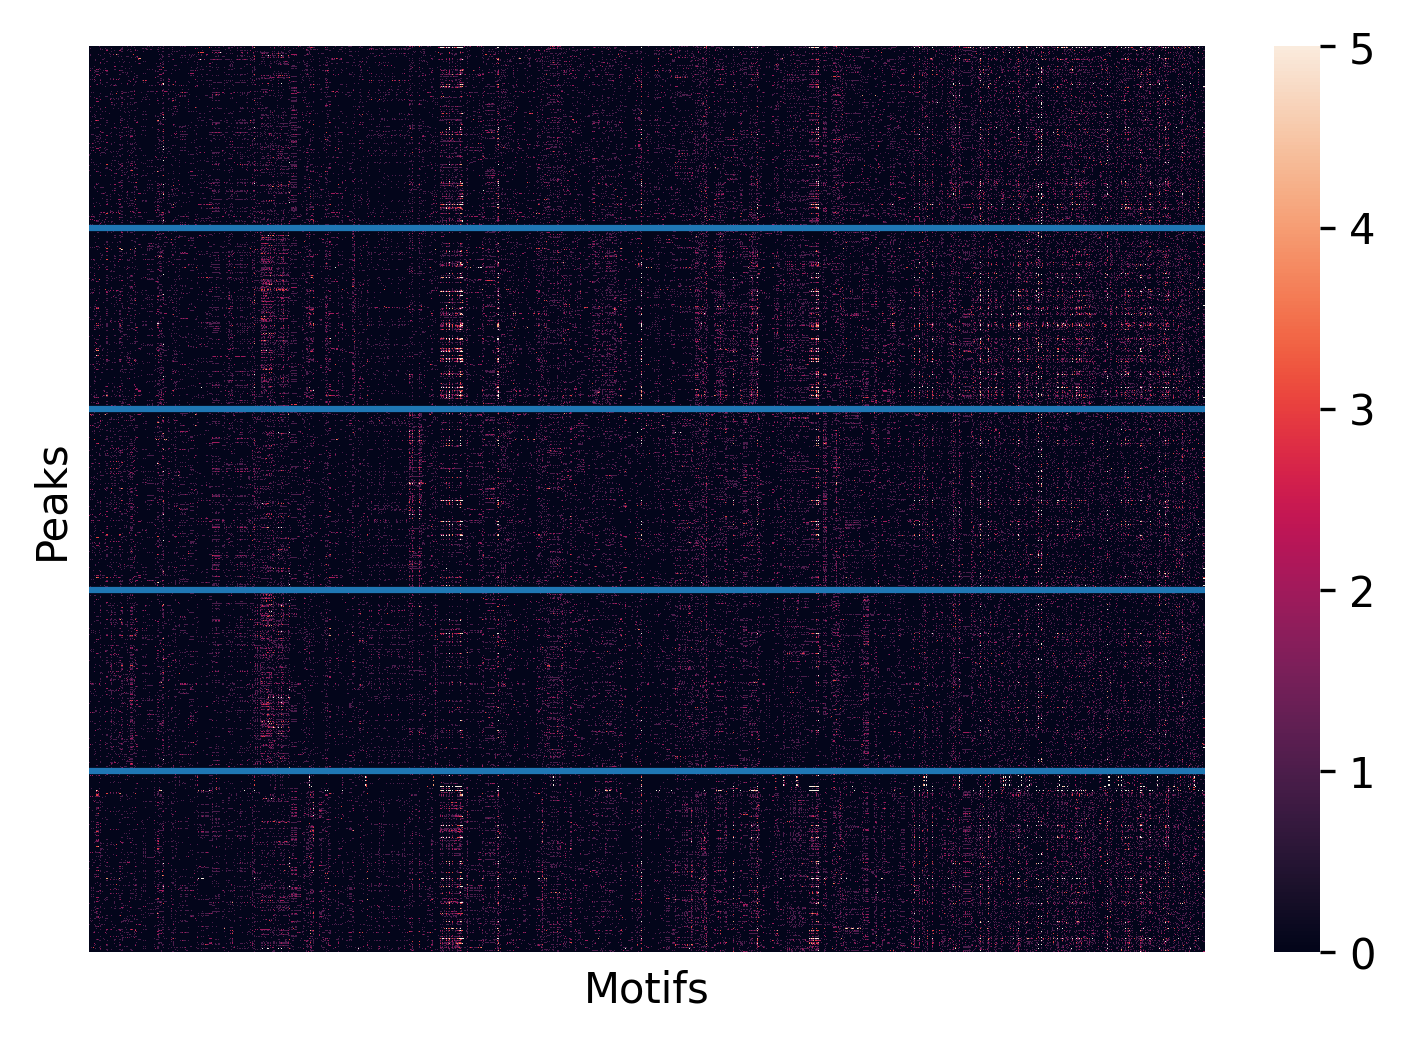

In [15]:
plt.figure(dpi=300)
sns.heatmap(count_data_topdiff.iloc[:,:-1], vmin=0, vmax=5)
plt.xticks([])
plt.yticks([])
plt.axhline(200)
plt.axhline(400)
plt.axhline(600)
plt.axhline(800)
plt.xlabel("Motifs")
plt.ylabel("Peaks")

Text(137.16666666666666, 0.5, 'Peaks')

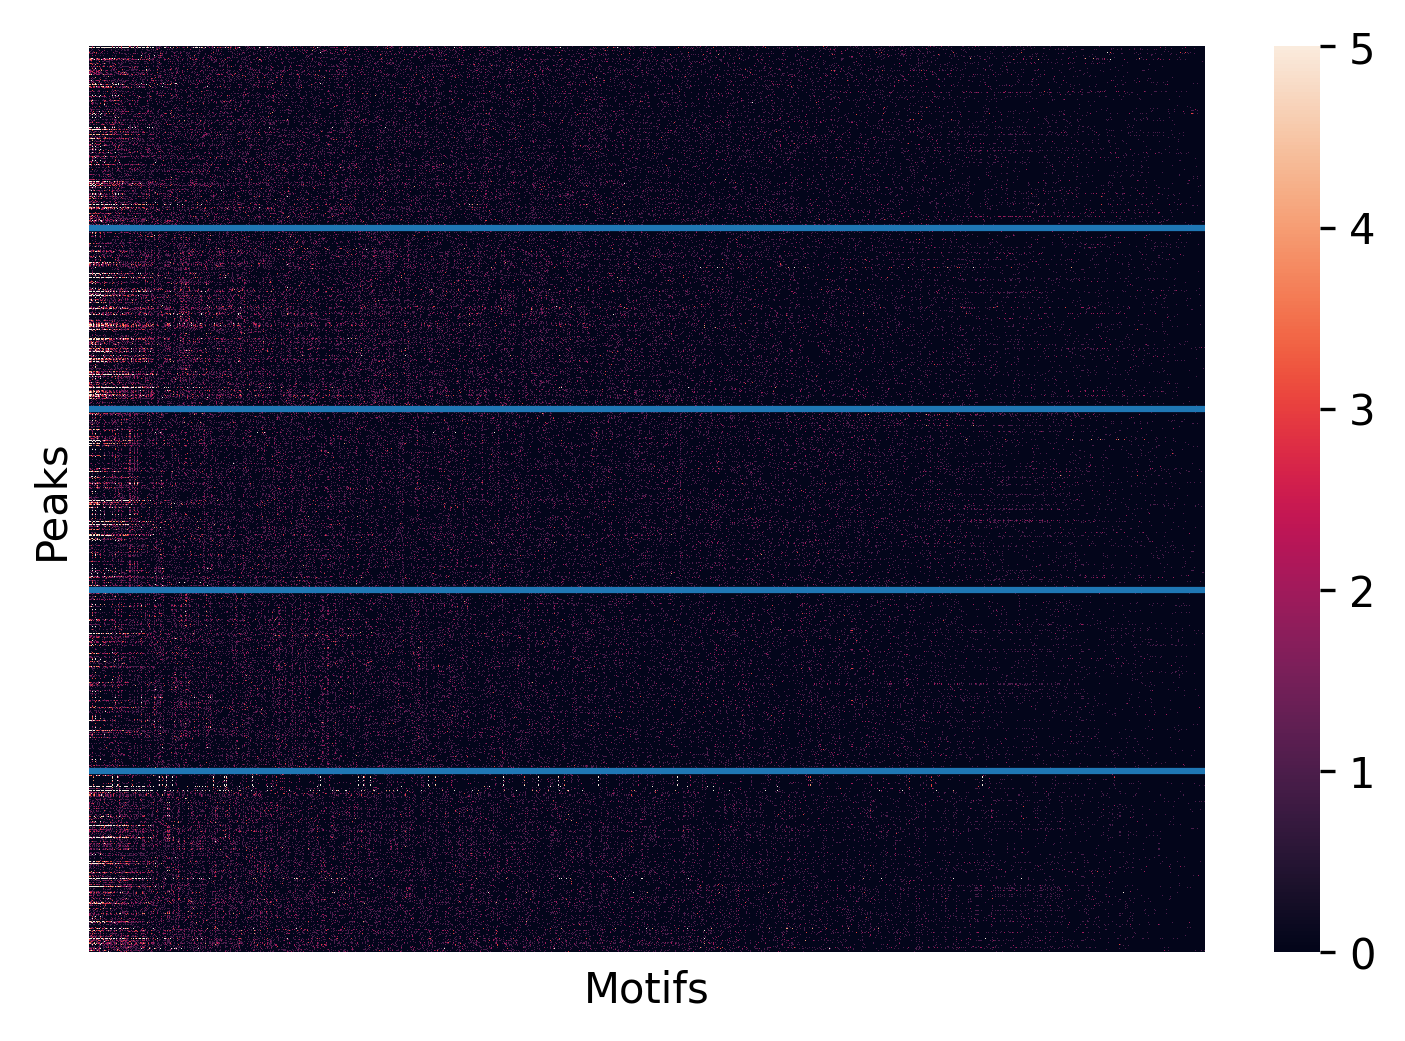

In [16]:
motif_sums = count_data_topdiff.iloc[:,:-1].sum()
count_data_tdiff_freq = count_data_topdiff[motif_sums.sort_values(ascending=False).index]
plt.figure(dpi=300)
sns.heatmap(count_data_tdiff_freq, vmin=0, vmax=5)
plt.xticks([])
plt.yticks([])
plt.axhline(200)
plt.axhline(400)
plt.axhline(600)
plt.axhline(800)
plt.xlabel("Motifs")
plt.ylabel("Peaks")

# PCA Transformation

Applying PCA and seeing what happens

In [19]:
count_topdiff_pca = PCA().fit_transform(np.log(1+count_data_topdiff.iloc[:,:-1]))

/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


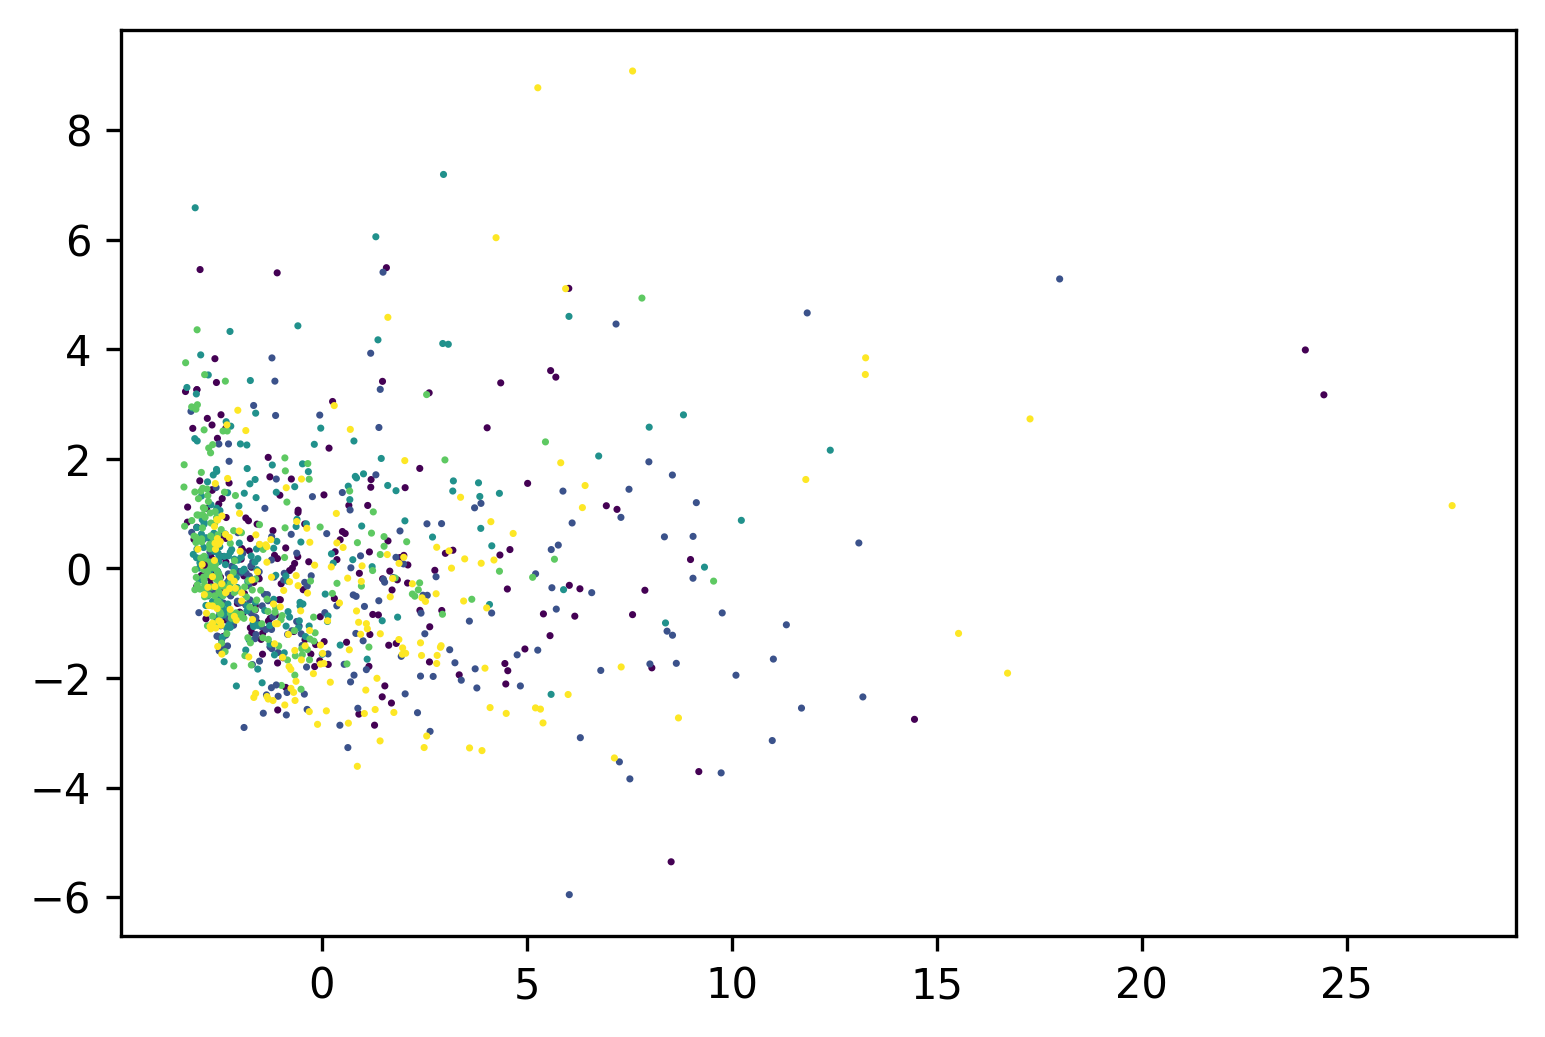

In [21]:
plt.figure(dpi=300)
plt.scatter(count_topdiff_pca[:,0], count_topdiff_pca[:,1], c=[["K562", "HEPG2", "GM12878", "IMR90", "H1ESC"].index(x) for x in count_data_topdiff["label"]], s=0.5)
# plt.xlim(-50, 100)
# plt.ylim(-10, 40)



In [22]:
silhouette_score(X=count_topdiff_pca, labels=count_data_topdiff["label"])

-0.027435463829049083

# Restrict to relevant motifs

Checking what the results look like if we restrict to only motifs we care about

In [27]:
count_data_topdiff_restricted = count_data_topdiff.filter(regex="SPI1|HNF4|GATA|FOS|JUN")

In [28]:
pc_topdiff_restricted = PCA().fit_transform(np.log(1+count_data_topdiff_restricted))

/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


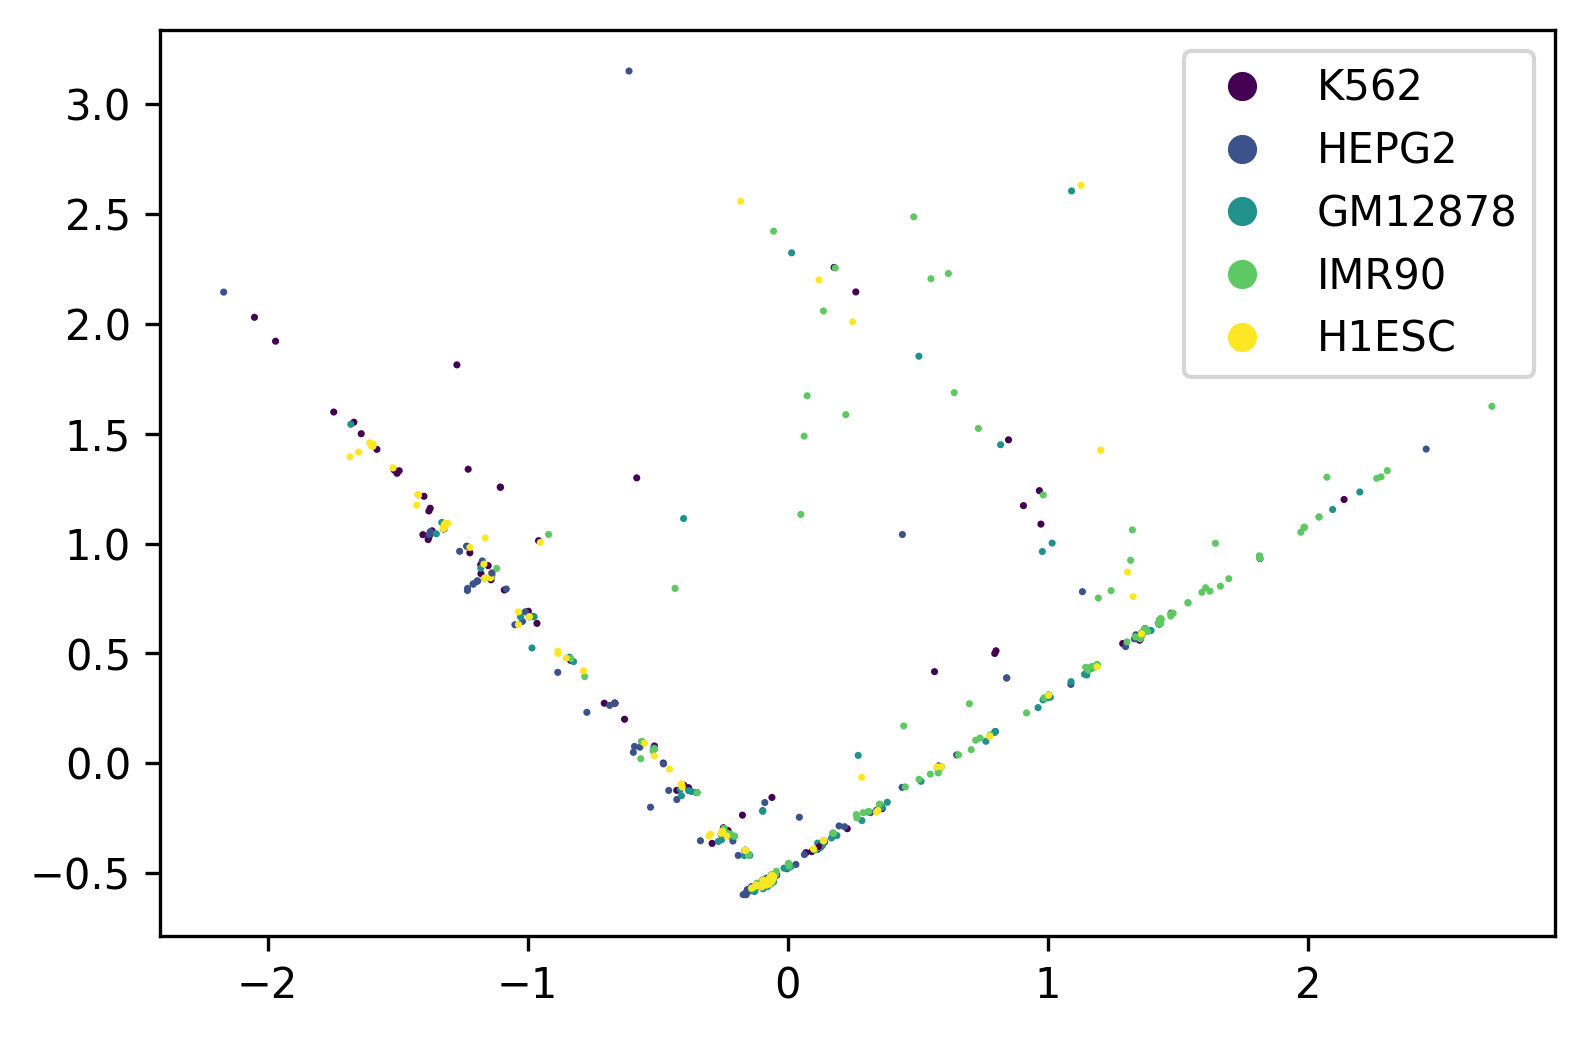

In [29]:
plt.figure(dpi=300)
scatter = plt.scatter(pc_topdiff_restricted[:,0], pc_topdiff_restricted[:,1], c=[["K562", "HEPG2", "GM12878", "IMR90", "H1ESC"].index(x) for x in count_data_topdiff["label"]], s=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=["K562", "HEPG2", "GM12878", "IMR90", "H1ESC"])


In [30]:
silhouette_score(X=pc_topdiff_restricted, labels=count_data_topdiff["label"])

-0.03877927644331925

Text(137.16666666666666, 0.5, 'Peaks')

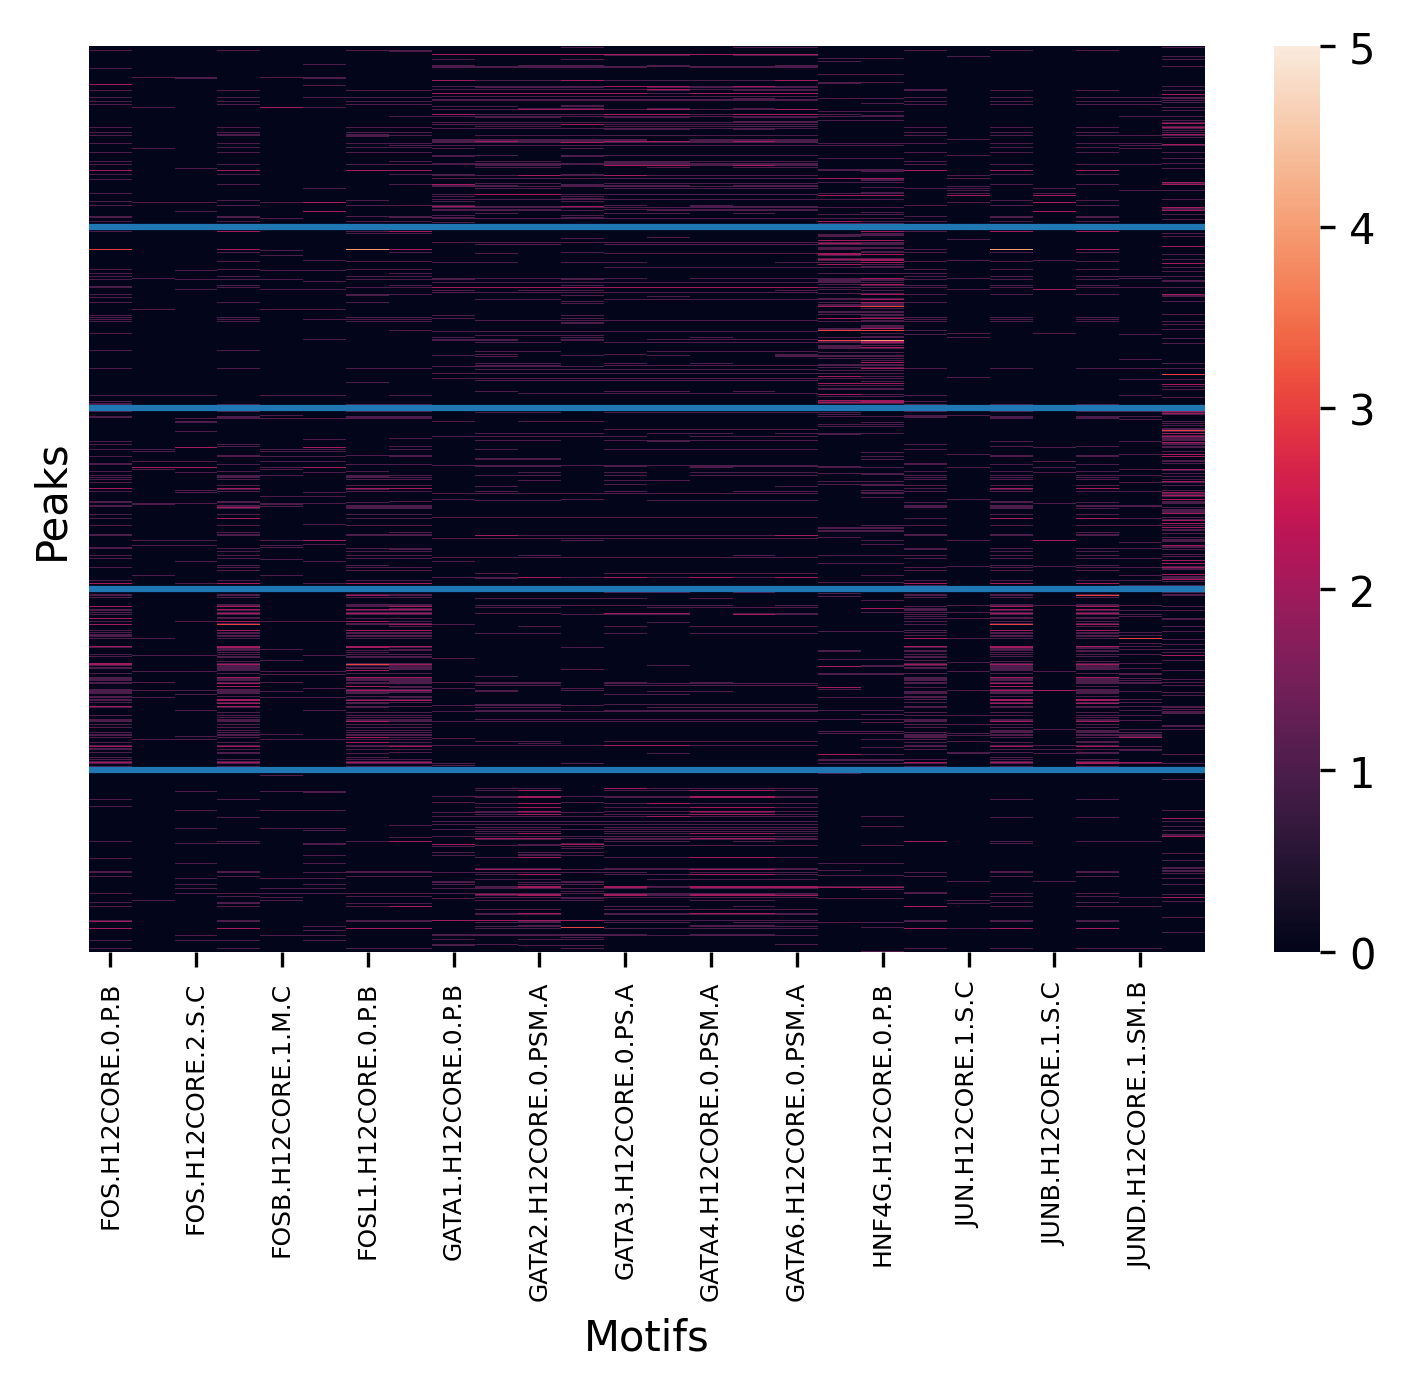

In [33]:
plt.figure(dpi=300)
sns.heatmap(count_data_topdiff_restricted.iloc[:,:-1], vmin=0, vmax=5)
# plt.xticks([])
plt.xticks(fontsize=6)
plt.yticks([])
plt.axhline(200)
plt.axhline(400)
plt.axhline(600)
plt.axhline(800)
plt.xlabel("Motifs")
plt.ylabel("Peaks")

# Aggregation of relevant motifs

We aggregate together all instances of SPI1, HNF4, GATA, and FOS/JUN (using the max for each) and see what the results look like with only that data

In [34]:
spi1_maxes = count_data_topdiff.filter(regex="SPI1").max(1)
hnf_maxes = count_data_topdiff.filter(regex="HNF4").max(1)
gata_maxes = count_data_topdiff.filter(regex="GATA").max(1)
ap1_maxes = count_data_topdiff.filter(regex="FOS|JUN").max(1)

maxes_df = pd.DataFrame([spi1_maxes, hnf_maxes, gata_maxes, ap1_maxes], index=["SPI1", "HNF4", "GATA", "AP1"]).T
maxes_df["label"] = count_data_topdiff["label"]

In [35]:
pca_maxes = PCA().fit_transform(np.log(1+maxes_df.iloc[:,:-1]))


/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Text(0, 0.5, 'PC2')

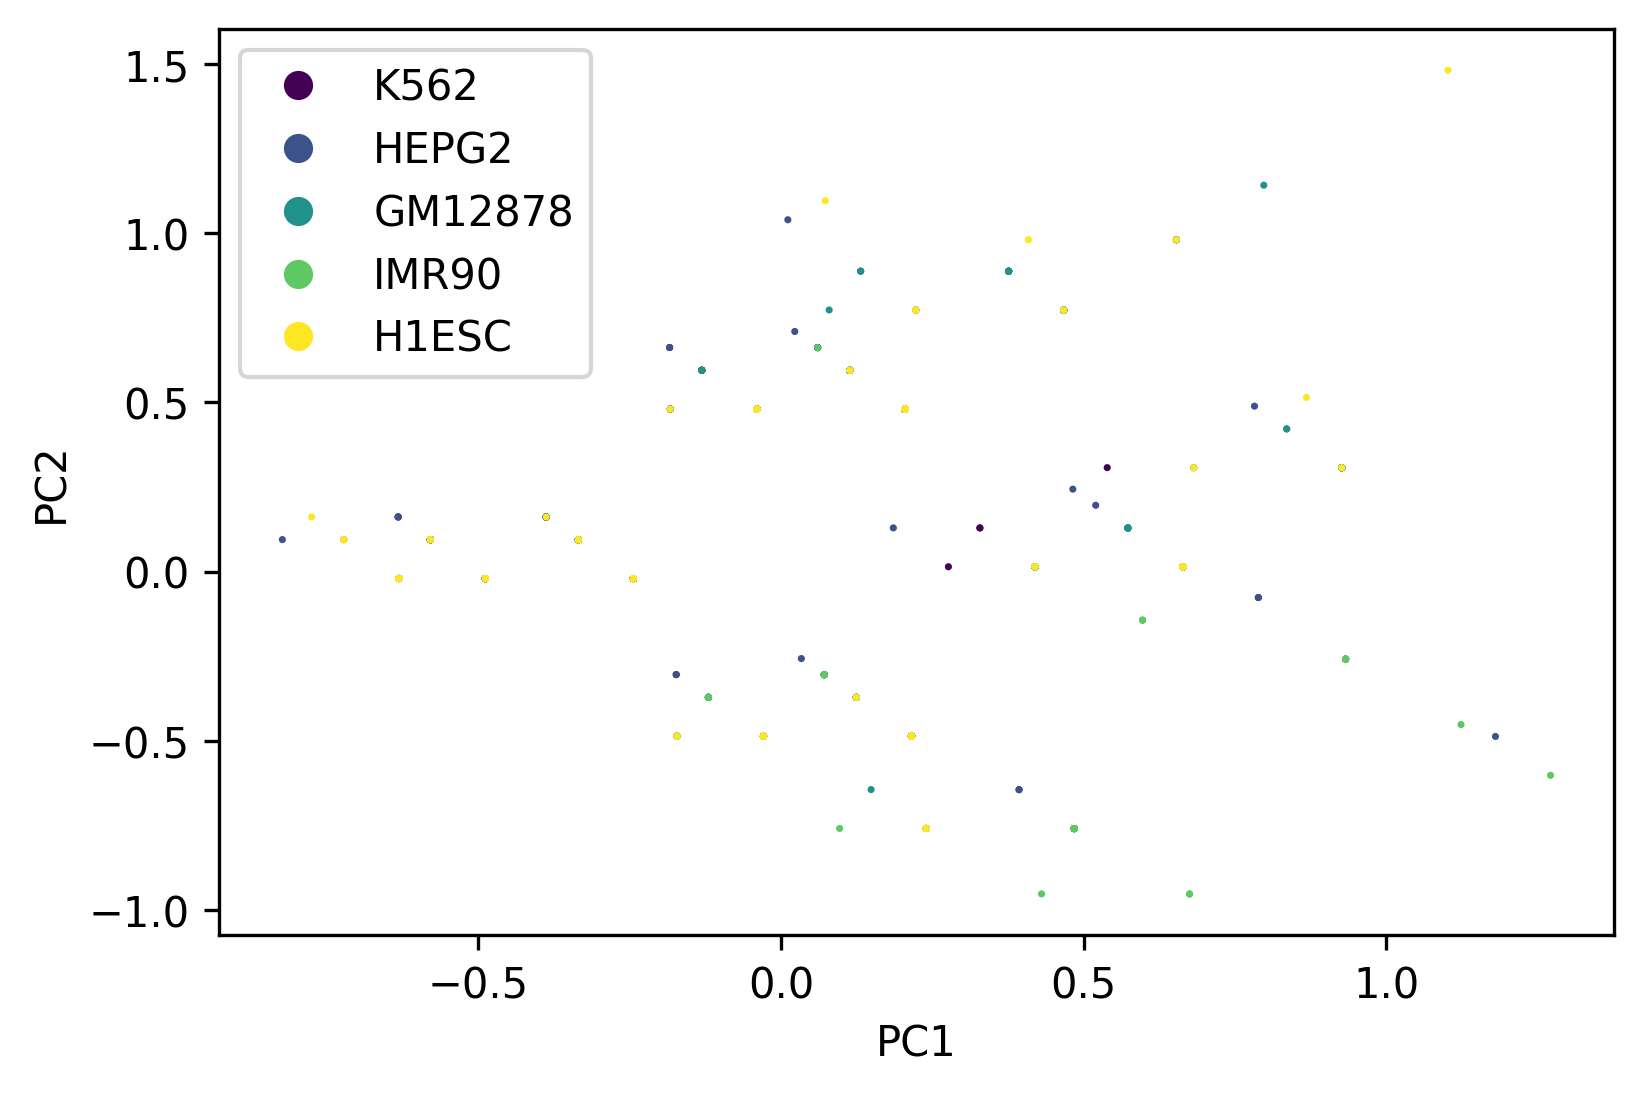

In [36]:
plt.figure(dpi=300)
scatter = plt.scatter(pca_maxes[:,0], pca_maxes[:,1], c=[["K562", "HEPG2", "GM12878", "IMR90", "H1ESC"].index(x) for x in count_data_topdiff["label"]], s=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=["K562", "HEPG2", "GM12878", "IMR90", "H1ESC"])
plt.xlabel("PC1")
plt.ylabel("PC2")


# Aggregation by HOCOMOCO Motif Family

We aggregate motifs into their HOCOMOCO families and look at performance on that aggregated data

In [37]:
motif_family_file = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/reference/H12CORE_motifs.tsv"
motif_family_data = pd.read_csv(motif_family_file, sep="\t", index_col=0)
# agg_data["Family"] = motif_family_data["TF family"]

In [38]:
family_counts = count_data_topdiff.groupby(motif_family_data["TF family"], axis=1).max()

/tmp/ipykernel_113946/2467565527.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  family_counts = count_data_topdiff.groupby(motif_family_data["TF family"], axis=1).max()


In [39]:
pca_family = PCA().fit_transform(np.log(1 + family_counts))

/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/users/patelas/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Text(0, 0.5, 'PC2')

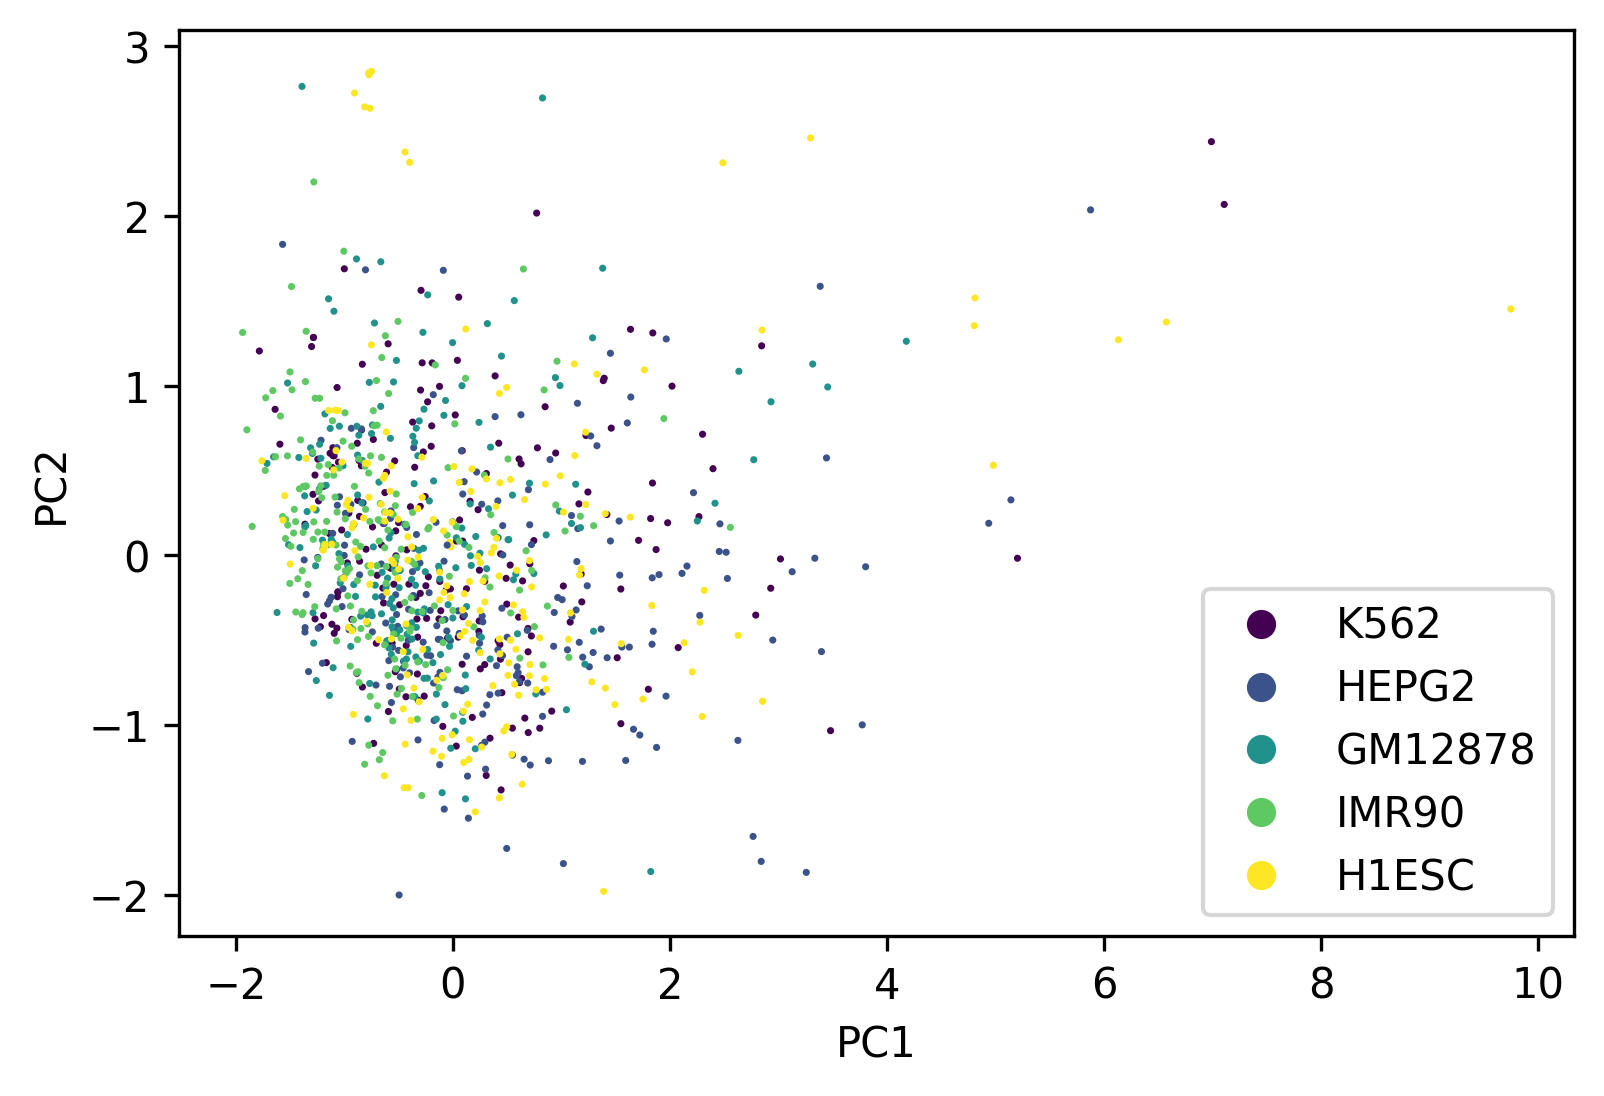

In [40]:
plt.figure(dpi=300)
scatter = plt.scatter(pca_family[:,0], pca_family[:,1], c=[["K562", "HEPG2", "GM12878", "IMR90", "H1ESC"].index(x) for x in count_data_topdiff["label"]], s=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=["K562", "HEPG2", "GM12878", "IMR90", "H1ESC"])
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.xlim(-10, 20)
# plt.ylim(-10, 20)

Text(137.16666666666666, 0.5, 'Peaks')

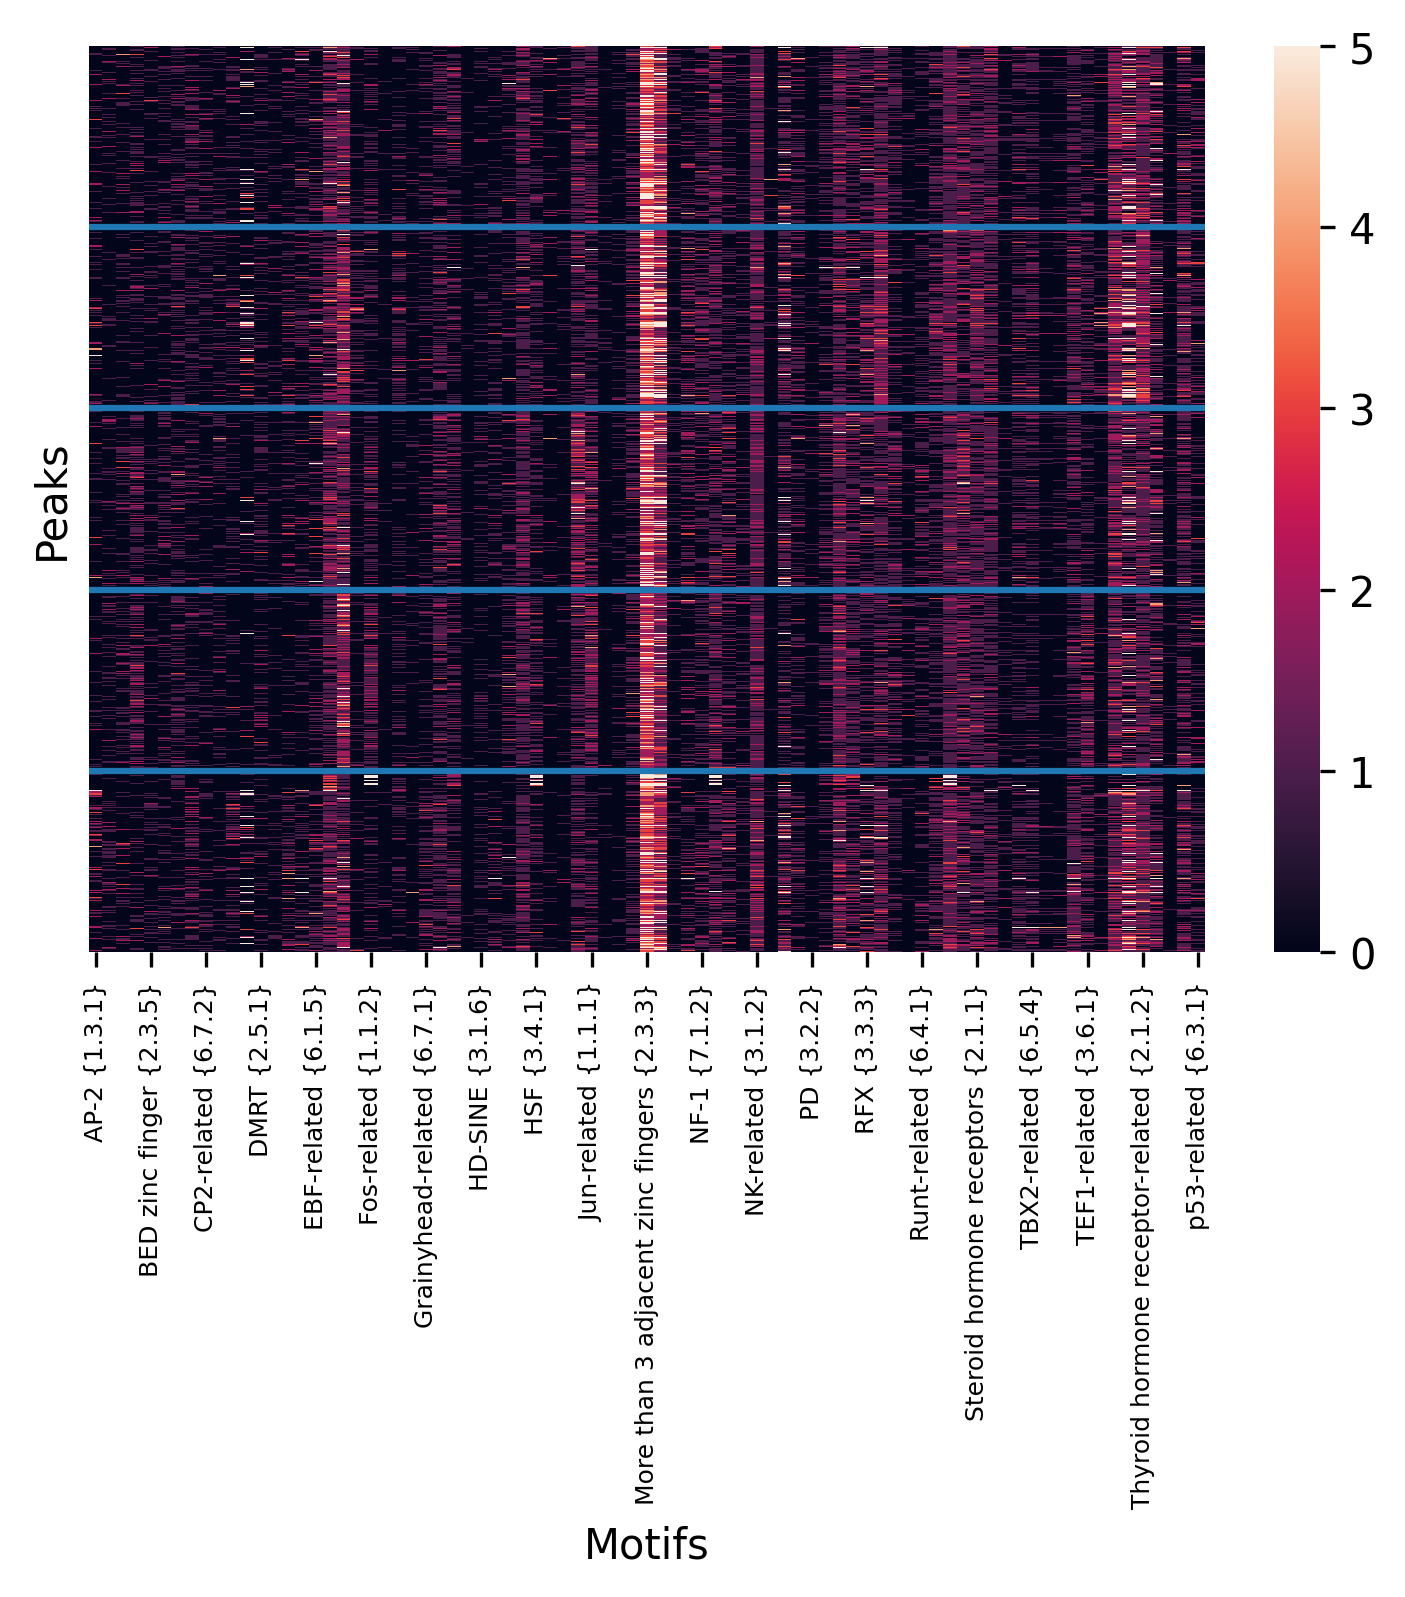

In [41]:
plt.figure(dpi=300)
sns.heatmap(family_counts, vmin=0, vmax=5)
# plt.xticks([])
plt.xticks(fontsize=6)
plt.yticks([])
plt.axhline(200)
plt.axhline(400)
plt.axhline(600)
plt.axhline(800)
plt.xlabel("Motifs")
plt.ylabel("Peaks")

Text(137.16666666666666, 0.5, 'Peaks')

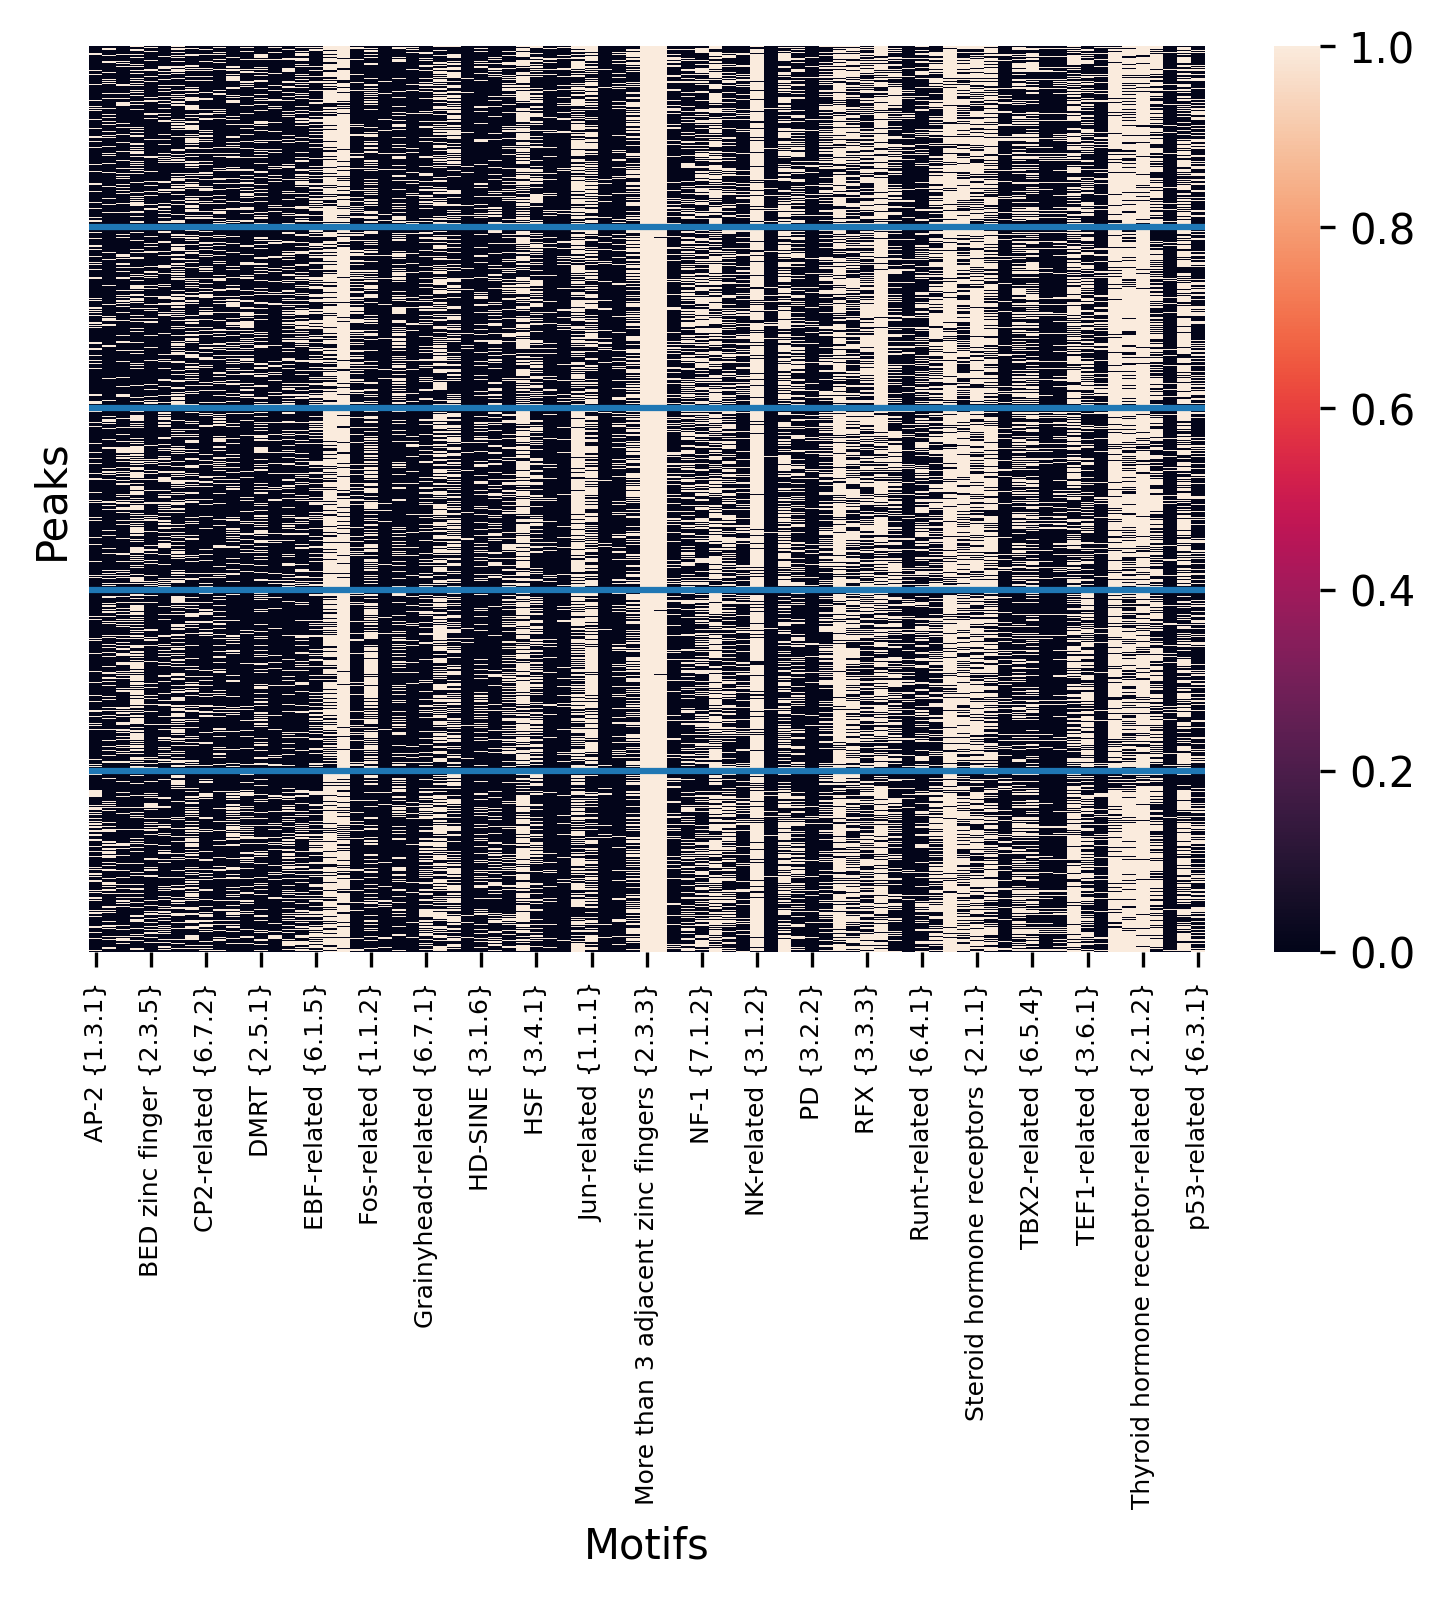

In [42]:
plt.figure(dpi=300)
sns.heatmap(family_counts > 0)
# plt.xticks([])
plt.xticks(fontsize=6)
plt.yticks([])
plt.axhline(200)
plt.axhline(400)
plt.axhline(600)
plt.axhline(800)
plt.xlabel("Motifs")
plt.ylabel("Peaks")